# In this notebook, we play with power series and study the convergence of them.

In [1]:
## import packages, and conventional abbrev.
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
import matplotlib 
import matplotlib.pyplot as plt

## for math display
from IPython.display import display, Markdown

## You already know that $\sum^{\infty}_{n=0}x^n=\frac{1}{1-x}$, for $|x|<1$. Although we can't definite "infinity" computationally, we can define a partial sum for a large $N$, and look at how it behaves to gain some intuition for when $N\to\infty$.

In [2]:
# define a geometric power series 

f = lambda x, N: sum([x**n for n in range(N)])

In [3]:
# test the convergence for |x|<1, and |x|>=1.

NN = 50

x = 0.5
f_small = []
for N in range(NN):
    f_small.append(f(x,N))

X = 1.1
f_large = []
for N in range(NN):
    f_large.append(f(X,N))   

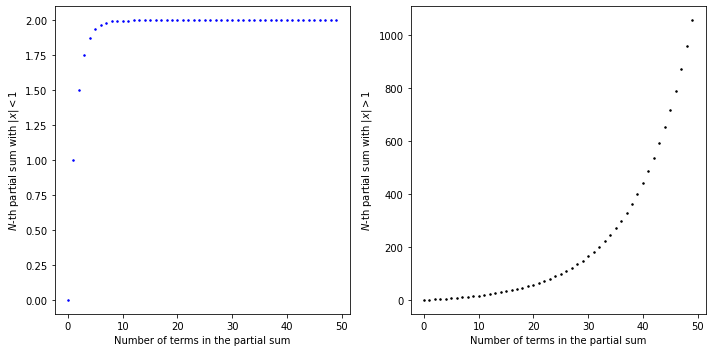

In [4]:
# visualize

steps = [n for n in range(NN)]


plt.figure(figsize = (10,5))
fig1 = plt.subplot(1,2,1)
plt.plot(steps,f_small,'b.',markersize=3)
plt.xlabel('Number of terms in the partial sum')
plt.ylabel('$N$-th partial sum with $|x|<1$')

fig2 = plt.subplot(1,2,2)
plt.plot(steps,f_large,'b.',markersize=3)
plt.xlabel('Number of terms in the partial sum')
plt.ylabel('$N$-th partial sum with $|x|>1$')

plt.tight_layout()
plt.show()

In [5]:
# test when x = 1 or -1

f_1 = []  

for N in range(NN):
    f_1.append(f(1,N))
    
f_negative1 = []  
for N in range(NN):
    f_negative1.append(f(-1,N)) 

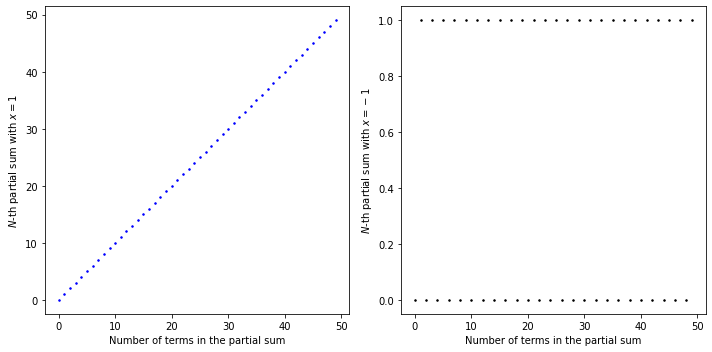

In [6]:
plt.figure(figsize = (10,5))
fig3 = plt.subplot(1,2,1)
plt.plot(steps,f_1,'b.',markersize=3)
plt.xlabel('Number of terms in the partial sum')
plt.ylabel('$N$-th partial sum with $x=1$')

fig4 = plt.subplot(1,2,2)
plt.plot(steps,f_negative1,'b.',markersize=3)
plt.xlabel('Number of terms in the partial sum')
plt.ylabel('$N$-th partial sum with $x=-1$')

plt.tight_layout()
plt.show()

In [7]:
# test with negative x and X

f_negative_small = []
for N in range(NN):
    f_negative_small.append(f(-x,N))

f_negative_large = []
for N in range(NN):
    f_negative_large.append(f(-X,N)) 

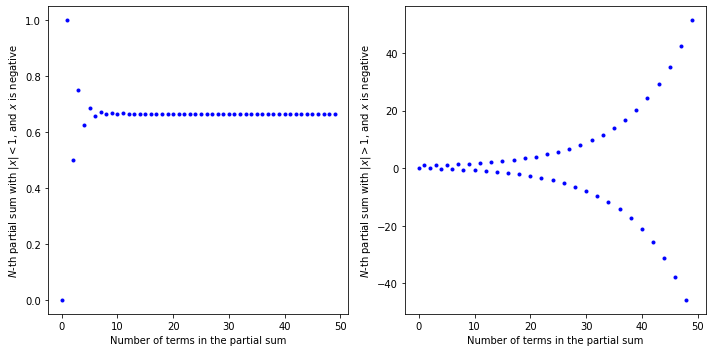

In [8]:
# visualize
steps_curve = np.linspace(steps[0], steps[-1],5000)
f_curve_negative_small = interp1d(steps, f_negative_small, kind='quadratic')
f_smooth_negative_small=f_curve_negative_small(steps_curve)

f_curve_negative_large = interp1d(steps, f_negative_large, kind='quadratic')
f_smooth_negative_large=f_curve_negative_large(steps_curve)

plt.figure(figsize = (10,5))
fig5 = plt.subplot(1,2,1)
plt.plot(steps,f_negative_small,'bo',markersize=3)
#plt.plot (steps_curve,f_smooth_negative_small, 'k')
plt.xlabel('Number of terms in the partial sum')
plt.ylabel('$N$-th partial sum with $|x|<1$, and $x$ is negative')

fig6 = plt.subplot(1,2,2)
plt.plot(steps,f_negative_large,'bo',markersize=3)
#plt.plot (steps_curve,f_smooth_negative_large, 'k')
plt.xlabel('Number of terms in the partial sum')
plt.ylabel('$N$-th partial sum with $|x|>1$, and $x$ is negative')

plt.tight_layout()
plt.show()

## We look at how term-wise differentiation might change the convergence or divergence. Integrate each term in $\sum^{\infty}_{n=0}x^n$, we get $\sum^{\infty}_{n=0}\frac{1}{n+1}x^n$; differentiate each term and we get $\sum^{\infty}_{n=0}(n+1)x^n$.

In [9]:
f_int = lambda x, N: sum([1/(n+1)*x**n for n in range(N)])
f_diff = lambda x, N: sum([(n+1)*x**n for n in range(N)])

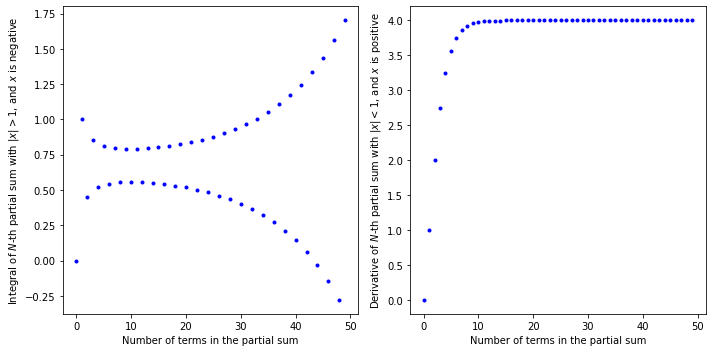

In [10]:
f_int_negative_large = []
for N in range(NN):
    f_int_negative_large.append(f_int(-X,N))

f_diff_small = []
for N in range(NN):
    f_diff_small.append(f_diff(x,N)) 
    
plt.figure(figsize = (10,5))
fig7 = plt.subplot(1,2,1)
plt.plot(steps,f_int_negative_large,'bo',markersize=3)
plt.xlabel('Number of terms in the partial sum')
plt.ylabel('Integral of $N$-th partial sum with $|x|>1$, and $x$ is negative')

fig8 = plt.subplot(1,2,2)
plt.plot(steps,f_diff_small,'bo',markersize=3)
plt.xlabel('Number of terms in the partial sum')
plt.ylabel('Derivative of $N$-th partial sum with $|x|<1$, and $x$ is positive')

plt.tight_layout()
plt.show()    